# Convolutional Neural Network

### Importing the libraries

In [4]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [5]:
# ImageDataGenerator make variation of same set of images in each epochs, 
# without changing/increasing the original dataset but instead making it more versatile.

train_datagen=ImageDataGenerator(
                          rescale=1./255,
                          zoom_range=0.2,
                          shear_range=0.2,
                          vertical_flip=True,
                          horizontal_flip=True,
                          width_shift_range=0.2,
                          height_shift_range=0.2
                      )

training_set = train_datagen.flow_from_directory(
                                                    "dataset/training_set",
                                                    target_size=(64,64),
                                                    class_mode="binary",
                                                    batch_size=32
                                                 )    

Found 8048 images belonging to 2 classes.


### Preprocessing the Test set

In [6]:
test_datagen=ImageDataGenerator(  rescale=1./255  )

test_set = test_datagen.flow_from_directory(
                                    "dataset/test_set",
                                    target_size=(64,64),
                                    class_mode="binary",
                                    batch_size=32
                                 )    

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [7]:
cnn=tf.keras.Sequential()

### Step 1 - Convolution

In [8]:
# Param = input * output + bias
# Param = (no of nodes) * (no of filter * size of filter) + (no of filter)
# Param = 3 (rgb) * (100 * 5 * 5) + 100 = 7600
cnn.add(tf.keras.layers.Conv2D(filters=100,kernel_size=5, activation="relu",input_shape=[64,64,3]))

### Step 2 - Pooling

In [9]:
# Param =  
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### Adding a second convolutional layer

In [10]:
# Param = input * output + bias
# Param = (previous layer filters) * (no of filter * size of filter) + (no of filter)
# Param = (100) * (100 * 5 * 5) + 100 = 250100
cnn.add(tf.keras.layers.Conv2D(filters=100,kernel_size=5,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### Step 3 - Flattening

In [11]:
# Param = (13) * (13) * 100 = 16900
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [12]:
# Param = (16900) * (128) + 128 = 2163328
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))
# Param = (128) * (128) + 128 = 16512
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))

### Step 5 - Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 100)       7600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 100)       250100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 16900)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2163328   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1

## Part 3 - Training the CNN

### Compiling the CNN

In [15]:
cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

### Training the CNN on the Training set and evaluating it on the Test set

In [16]:
model_history = cnn.fit(x=training_set, validation_data=test_set, epochs=35)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 252 steps, validate for 63 steps
Epoch 1/35
252/252 [==============================] - 204s 811ms/step - loss: 0.6939 - accuracy: 0.5094 - val_loss: 0.6902 - val_accuracy: 0.5245
Epoch 2/35
252/252 [==============================] - 176s 699ms/step - loss: 0.6890 - accuracy: 0.5364 - val_loss: 0.6848 - val_accuracy: 0.5675
Epoch 3/35
252/252 [==============================] - 177s 701ms/step - loss: 0.6840 - accuracy: 0.5533 - val_loss: 0.6814 - val_accuracy: 0.5680
Epoch 4/35
252/252 [==============================] - 245s 972ms/step - loss: 0.6869 - accuracy: 0.5444 - val_loss: 0.6854 - val_accuracy: 0.5555
Epoch 5/35
252/252 [==============================] - 234s 929ms/step - loss: 0.6843 - accuracy: 0.5564 - val_loss: 0.6770 - val_accuracy: 0.5690
Epoch 6/35
252/252 [==============================] - 224s 888ms/step - loss: 0.6844 - accuracy: 0.5541 - val_loss: 0.6748 - val_accuracy: 0.5895
Epoch 7/35
252/252 [===========

## Part 4 - Making a single prediction

In [17]:
from keras.preprocessing import image
import numpy as np

In [18]:
image_set=image.load_img("dataset/single_prediction/cat_or_dog_1.jpg", target_size=(64,64),)
image_set=image.img_to_array(image_set)
image_set=np.expand_dims(image_set, axis=0)
result=cnn.predict(image_set)
if result[0][0]==1:
    print("dog")
else:
    print("cat")

dog


In [49]:
image_set=image.load_img("dataset/single_prediction/cat_or_dog_2.jpg", target_size=(64,64),)
image_set=image.img_to_array(image_set)
image_set=np.expand_dims(image_set, axis=0)
result=cnn.predict(image_set)
if result[0][0]==1:
    print("dog")
else:
    print("cat")

cat


In [50]:
image_set=image.load_img("dataset/single_prediction/cat_or_dog_3.jpg", target_size=(64,64),)
image_set=image.img_to_array(image_set)
image_set=np.expand_dims(image_set, axis=0)
result=cnn.predict(image_set)
if result[0][0]==1:
    print("dog")
else:
    print("cat")

dog


In [51]:
image_set=image.load_img("dataset/single_prediction/cat_or_dog_4.jpg", target_size=(64,64),)
image_set=image.img_to_array(image_set)
image_set=np.expand_dims(image_set, axis=0)
result=cnn.predict(image_set)
if result[0][0]==1:
    print("dog")
else:
    print("cat")

cat


# Model Evaluation

In [20]:
import matplotlib.pyplot as plt

In [21]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


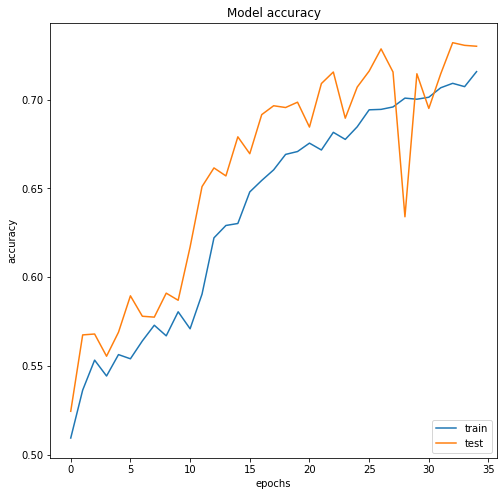

In [22]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(["train","test"], loc="lower right")
plt.title("Model accuracy")
plt.show()

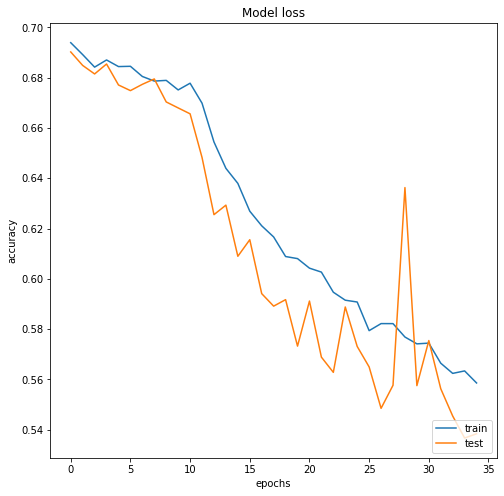

In [23]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(["train","test"], loc="lower right")
plt.title("Model loss")
plt.show()